In [ ]:
#This is for ML Ex5

In [1]:
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt
from scipy import optimize as opt
import scipy.io
import random

In [789]:
#InputData image & weights
input_data = scipy.io.loadmat(r"C:\Users\Yow-Gwo Wang\Desktop\ML\machine-learning-ex5\machine-learning-ex5\ex5\ex5data1.mat")
input_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Fri Nov  4 22:27:26 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[-15.93675813],
        [-29.15297922],
        [ 36.18954863],
        [ 37.49218733],
        [-48.05882945],
        [ -8.94145794],
        [ 15.30779289],
        [-34.70626581],
        [  1.38915437],
        [-44.38375985],
        [  7.01350208],
        [ 22.76274892]]),
 'y': array([[ 2.13431051],
        [ 1.17325668],
        [34.35910918],
        [36.83795516],
        [ 2.80896507],
        [ 2.12107248],
        [14.71026831],
        [ 2.61418439],
        [ 3.74017167],
        [ 3.73169131],
        [ 7.62765885],
        [22.7524283 ]]),
 'Xtest': array([[-33.31800399],
        [-37.91216403],
        [-51.20693795],
        [ -6.13259585],
        [ 21.26118327],
        [-40.31952949],
        [-14.54153167],
        [ 32.55976024],
        [ 13.39343255],
        [ 44.20988595],
        [ -1.14267768],
        [-

Text(0,0.5,'Water flowing out of the dem')

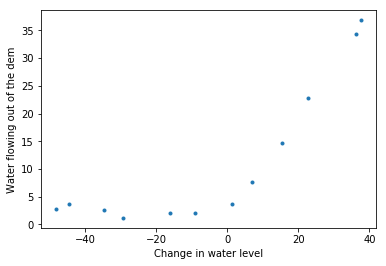

In [809]:
#read in the data set for this exercise
X = input_data['X']
y = input_data['y']
Xval = input_data['Xval']
yval = input_data['yval']
Xtest = input_data['Xtest']
ytest = input_data['ytest']
plt.plot(X, y, '.')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dem')

In [785]:
def lrCostFunction(theta, X, y, lamdba):
    theta = theta.reshape(X.shape[1],1)
    J = 0
    delta_J = np.zeros(X.shape[1])
    m = y.size
    x = np.dot(X, theta)
    a = 1/(2*m)
    b = np.square(x - y)
    c = lamdba/(2*m)*(np.square(theta).sum() - np.square(theta[0]))
    d = (x-y)
    e = lamdba/m*(theta)
    
    J = a*b.sum()+c
    delta_J = 2*a*np.dot(X.transpose(), d)+e    
    delta_J[0] = delta_J[0] - (lamdba/m*(theta[0])) 

    return J, delta_J

In [810]:
#Verify the linearRegrssion cost function
theta_init = np.row_stack((1,1))
theta_init.shape
X_t = np.column_stack((np.ones(12), X))
j, delta_j = lrCostFunction(theta_init, X_t, y, 1)
print(j)
print(delta_j)

[303.99319222]
[[-15.30301567]
 [598.25074417]]


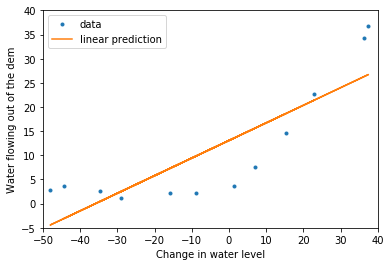

In [812]:
#Using the only feature from the input to do linear fit
result = opt.minimize(fun=lrCostFunction, x0=theta_init, args=(X_t, y, 100), 
                      method='TNC', jac=True, options={'maxiter': 1000})
theta = np.matrix(result.x)
theta = theta.reshape(2,1)

plt.plot(X, y, '.', label='data')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dem')
plt.plot(X, np.dot(X_t,theta), label='linear prediction')
plt.xlim([-50,40])
plt.ylim([-5,40])
plt.legend()

In [813]:
def learningCurve(Xin, yin, X_in_val, y_in_val, lamdba):
    m = X.shape[0]
    error_train = np.zeros(Xin.shape[0]-1)
    error_val = np.zeros(Xin.shape[0]-1)
    for idx in range(1,m):
        X_t_sub = Xin[0:idx,:]
        y_t_sub = yin[0:idx,:]
        theta_init = np.column_stack(np.zeros(X_t_sub.shape[1]))
        result = opt.minimize(fun=lrCostFunction, x0=theta_init, args=(X_t_sub, y_t_sub, lamdba), 
                method='TNC', jac=True, options={'maxiter': 1000})
        theta = np.matrix(result.x)
        error_train[idx-1], _ = lrCostFunction(theta, X_t_sub, y_t_sub, 0)
        error_val[idx-1], _ = lrCostFunction(theta, X_in_val, y_in_val, lamdba)
    return error_train, error_val

Text(0,0.5,'error')

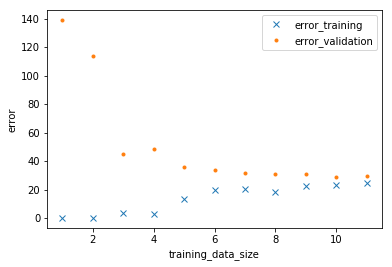

In [817]:
#Shoing the impact of training data size on training error and validatoin error
#More data has higher training error means the model has high bias
X_t = np.column_stack((np.ones(X.shape[0]), X))
X_val_t = np.column_stack((np.ones(Xval.shape[0]), Xval))
err_t, err_v = learningCurve(X_t, y, X_val_t, yval, 10)
plt.plot(x_idx, err_t, 'x', label='error_training')
plt.plot(x_idx, err_v, '.', label='error_validation')
plt.legend()
plt.xlabel('training_data_size')
plt.ylabel('error')

In [818]:
def polyFeature(Xin, p):
    X_poly = np.zeros((Xin.shape[0],p))
    for i in range(p):
        X_poly[:, i] = np.power(Xin[:, 0], i+1)
    return X_poly

In [819]:
def featureNormalize(Xin):
    col = Xin.shape[1]
    X_norm = Xin.copy()
    mu = np.zeros((col, 1))
    sigma = np.zeros((col, 1))
    
    for idx in range(col):
        mu[idx] = Xin[:,idx].mean()
        sigma[idx] = Xin[:,idx].std()
        X_norm[:,idx] = (Xin[:,idx] - Xin[:,idx].mean())/Xin[:,idx].std()

    return X_norm, mu, sigma

In [820]:
X = input_data['X']
y = input_data['y']
Xval = input_data['Xval']
yval = input_data['yval']
Xtest = input_data['Xtest']
ytest = input_data['ytest']
X8 = polyFeature(X, 8)
X8_norm , _ , _ = featureNormalize(X8)
X_t = np.column_stack((np.ones(12), X8_norm))
theta_init = np.row_stack(np.ones(X_t.shape[1]))

X8_val = polyFeature(Xval, 8)
X8_val_norm , _ , _ = featureNormalize(X8_val)

X8_test = polyFeature(Xtest, 8)
X8_test_norm , _ , _ = featureNormalize(X8_test)

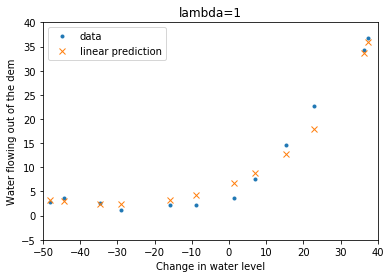

In [821]:
#Using new feature created by us and shows a better fit to the data
result = opt.minimize(fun=lrCostFunction, x0=theta_init, args=(X_t, y, 1), 
                      method='TNC', jac=True, options={'maxiter': 1000})
theta = np.matrix(result.x)
theta = theta.reshape(9,1)
plt.plot(X, y, '.', label='data')
plt.title('lambda=1')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dem')
plt.plot(X, np.dot(X_t,theta),'x' ,label='linear prediction')
plt.xlim([-50,40])
plt.ylim([-5,40])
plt.legend()

Text(0,0.5,'error')

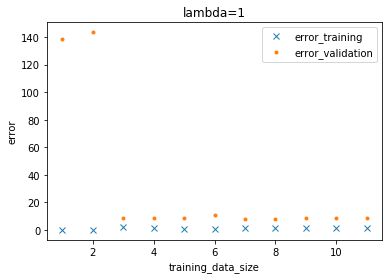

In [822]:
#Shows the results with more feature, the training error should remain low
#while the validation error gets improved
X_t = np.column_stack((np.ones(X8_norm.shape[0]), X8_norm))
X_val_t = np.column_stack((np.ones(X8_val_norm.shape[0]), X8_val_norm))
err_t, err_v = learningCurve(X_t, y, X_val_t, yval, 1)
plt.plot(x_idx, err_t, 'x', label='error_training')
plt.plot(x_idx, err_v, '.', label='error_validation')
plt.legend()
plt.title('lambda=1')
plt.xlabel('training_data_size')
plt.ylabel('error')

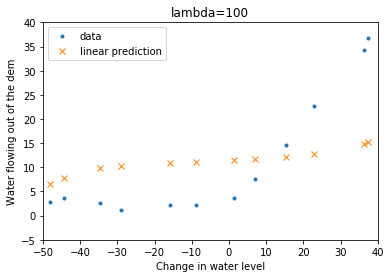

In [823]:
#shows the impact of regularization
result = opt.minimize(fun=lrCostFunction, x0=theta_init, args=(X_t, y, 100), 
                      method='TNC', jac=True, options={'maxiter': 1000})
theta = np.matrix(result.x)
theta = theta.reshape(9,1)
plt.plot(X, y, '.', label='data')
plt.title('lambda=100')
plt.xlabel('Change in water level')
plt.ylabel('Water flowing out of the dem')
plt.plot(X, np.dot(X_t,theta),'x' ,label='linear prediction')
plt.xlim([-50,40])
plt.ylim([-5,40])
plt.legend()

Text(0,0.5,'error')

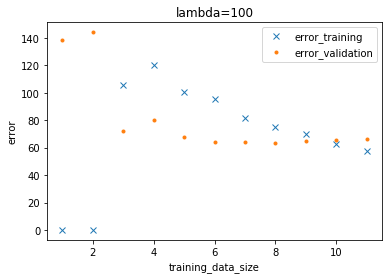

In [824]:
#shows the impact of regularization

X_t = np.column_stack((np.ones(X8_norm.shape[0]), X8_norm))
X_val_t = np.column_stack((np.ones(X8_val_norm.shape[0]), X8_val_norm))
err_t, err_v = learningCurve(X_t, y, X_val_t, yval, 100)
plt.plot(x_idx, err_t, 'x', label='error_training')
plt.plot(x_idx, err_v, '.', label='error_validation')
plt.title('lambda=100')
plt.legend()
plt.xlabel('training_data_size')
plt.ylabel('error')

In [825]:
def validationCurve(Xin, yin, X_in_val, y_in_val):
    m = X.shape[0]
    lamdba = np.array((0,0.001,0.003,0.1,0.3,1,3,10))
    error_train = np.zeros(lamdba.shape[0])
    error_val = np.zeros(lamdba.shape[0])
    for idx, l in enumerate(lamdba):
        theta_init = np.column_stack(np.zeros(Xin.shape[1]))
        result = opt.minimize(fun=lrCostFunction, x0=theta_init, args=(Xin, yin, l), 
                method='TNC', jac=True, options={'maxiter': 1000})
        theta = np.matrix(result.x)
        error_train[idx], _ = lrCostFunction(theta, Xin, yin, 0)
        error_val[idx], _ = lrCostFunction(theta, X_in_val, y_in_val, l)
    return error_train, error_val

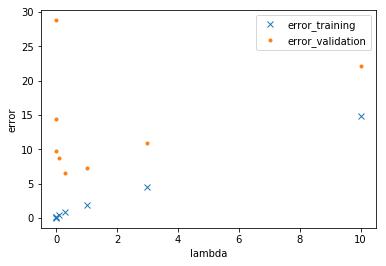

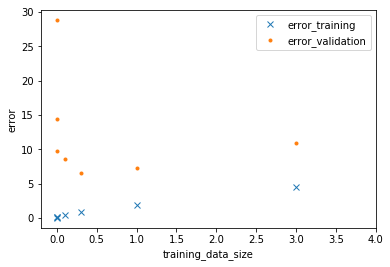

In [826]:
#varying lamdba to find the best regularization variable
err_t, err_v = validationCurve(X_t, y, X_val_t, yval)
x_l = np.array((0,0.001,0.003,0.1,0.3,1,3,10))
plt.plot(x_l, err_t, 'x', label='error_training')
plt.plot(x_l, err_v, '.', label='error_validation')
plt.legend()
plt.xlabel('lambda')
plt.ylabel('error')
plt.show()

plt.plot(x_l, err_t, 'x', label='error_training')
plt.plot(x_l, err_v, '.', label='error_validation')
plt.legend()
plt.xlabel('training_data_size')
plt.ylabel('error')
plt.xlim([-0.2,4])
plt.show()

In [828]:
#Get the test error using the best lambda we found.
X_test_t = np.column_stack((np.ones(X8_test_norm.shape[0]), X8_test_norm))
result = opt.minimize(fun=lrCostFunction, x0=theta_init, args=(X_t, y, 0.3), 
                     method='TNC', jac=True, options={'maxiter': 1000})
theta = np.matrix(result.x)
error_test, grad = lrCostFunction(theta, X_test_t, ytest, 0.3)
print(error_test)

[[8.91624243]]
